In [8]:
# Necessary imports

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit
import scipy.optimize as opt
from tqdm import tqdm
from scipy import signal
from scipy.constants import c
from scipy.ndimage import gaussian_filter
from astropy.convolution import convolve, Box2DKernel
from astropy.convolution import convolve, Gaussian1DKernel, Gaussian2DKernel, Box1DKernel, MexicanHat1DKernel, RickerWavelet1DKernel
from scipy import ndimage, misc
from astropy.modeling import models, fitting
from astropy.wcs import WCS
import time
import cwitools
from cwitools.scripts import *
import cc3d

import matplotlib.pyplot as plt

import matplotlib as mpl
from scipy.integrate import quad
import copy

from astropy.convolution import convolve, Gaussian1DKernel, Gaussian2DKernel, Box1DKernel
import matplotlib.colors

from astropy import units as u
from astropy.nddata import StdDevUncertainty
from astropy.modeling import models
from specutils import Spectrum1D, SpectralRegion
from specutils.analysis import snr 
from specutils.analysis import snr_derived
from specutils.analysis import line_flux
%matplotlib inline
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
mpl.rcParams['figure.figsize'] = (10.0, 10.0)     # set figure size
mpl.rcParams['font.family'] = 'Serif'      # set font
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.size'] = 17
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.top'] = True  
mpl.rcParams['ytick.right'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 7
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['ytick.major.size'] = 7
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15


In [3]:
from pylab import *
from matplotlib import rcParams, colors


#------------#
######### SAURON COLORMAP ##############
#
# Original format:
#x = [1.0, 43.5, 86.0, 86.0+20, 128.5-10, 128.5, 128.5+10, 171.0-20, 171.0, 213.5, 256.0]
#red =   [0.01, 0.0, 0.4,  0.5, 0.3, 0.0, 0.7, 1.0, 1.0,  1.0, 0.9]
#green = [0.01, 0.0, 0.85, 1.0, 1.0, 0.9, 1.0, 1.0, 0.85, 0.0, 0.9]
#blue =  [0.01, 1.0, 1.0,  1.0, 0.7, 0.0, 0.0, 0.0, 0.0,  0.0, 0.9]

_sauron_data = {
    'red': ((0.0,0.01,0.01),
            (0.169921875,0.0,0.0),
            (0.3359375,0.4,0.4),
            (0.4140625,0.5,0.5),
            (0.462890625,0.3,0.3),
            (0.501953125,0.0,0.0),
            (0.541015625,0.7,0.7),
            (0.58984375,1.0,1.0),
            (0.66796875,1.0,1.0),
            (0.833984375,1.0,1.0),
            (1.0,0.9,0.9)),
    'green':((0.0,0.01,0.01),
             (0.169921875,0.0,0.0),
             (0.3359375,0.85,0.85),
             (0.4140625,1.0,1.0),
             (0.462890625,1.0,1.0),
             (0.501953125,0.9,0.9),
             (0.541015625,1.0,1.0),
             (0.58984375,1.0,1.0),
             (0.66796875,0.85,0.85),
             (0.833984375,0.0,0.0),
             (1.0,0.9,0.9)),
    'blue':((0.0,0.01,0.01),
            (0.169921875,1.0,1.0),
            (0.3359375,1.0,1.0),
            (0.4140625,1.0,1.0),
            (0.462890625,0.7,0.7),
            (0.501953125,0.0,0.0),
            (0.541015625,0.0,0.0),
            (0.58984375,0.0,0.0),
            (0.66796875,0.0,0.0),
            (0.833984375,0.0,0.0),
            (1.0,0.9,0.9))
    }
_sauron_inv_data = {
    'red': ((0.0,1.0,1.0),
            (0.169921875,1.0,1.0),
            (0.3359375,1.0,1.0),
            (0.4140625,0.4,0.4),
            (0.462890625,0.7,0.7),
            (0.501953125,0.0,0.0),
            (0.541015625,0.3,0.3),
            (0.58984375,0.5,0.5),
            (0.66796875,0.0,0.0),
            (0.833984375,1.0,1.0),
            (1.0,0.01,0.01)),
    'green':((0.0,1.0,1.0),
             (0.169921875,0.0,0.0),
             (0.3359375,0.85,0.85),
             (0.4140625,1.0,1.0),
             (0.462890625,1.0,1.0),
             (0.501953125,0.9,0.9),
             (0.541015625,1.0,1.0),
             (0.58984375,1.0,1.0),
             (0.66796875,0.85,0.85),
             (0.833984375,0.0,0.0),
             (1.0,0.01,0.01)),
    'blue':((0.0,1.0,1.0),
            (0.169921875,0.0,0.0),
            (0.3359375,0.0,0.0),
            (0.4140625,0.0,0.0),
            (0.462890625,0.0,0.0),
            (0.501953125,0.0,0.0),
            (0.541015625,0.7,0.7),
            (0.58984375,1.0,1.0),
            (0.66796875,1.0,1.0),
            (0.833984375,1.0,1.0),
            (1.0,0.01,0.01))
    }

sauron=colors.LinearSegmentedColormap('sauron', _sauron_data)
sauron_inv=colors.LinearSegmentedColormap('sauron_inv', _sauron_inv_data)
register_cmap(cmap=sauron)
register_cmap(cmap=sauron_inv)
rcParams['image.cmap']='sauron'


In [ ]:
convolve()

In [4]:
def smooth_flux(flux,kernel2d):
    # smooth the kcwi datacube for 3D aperture
    # kernel2d: 2d gaussian kernel to smooth spatial information
    # 1D kernel for wavelength axis, 2.5 \AA
    # print(np.shape(flux))
    # kernel2d = Box2DKernel(3)
    x,y = np.shape(flux[0])
    kernel1d = Box1DKernel(2.2/0.5)
    for i in range(x):
        for j in range(y):
            spec = flux[:,i,j]
            spec = gaussian_filter(spec, sigma=2)
            # spec = convolve(spec, kernel1d,boundary=None)

            # print(np.shape(spec))
            flux[:,i,j] = spec   
    for s in range(len(flux)):
        slab = flux[s]
        slab = convolve(slab, kernel2d)
        flux[s] = slab        
    return flux

def vel_from_z(z):
    val = (( (z+1)**2 - 1 )/( (z+1)**2 + 1 ))*c
    return val

def get_wav_obs(v,wave_rest):
    v = v*1e3
    return (v/c+1)*wave_rest

def get_redshift(obs, rest):
    return (obs/rest) - 1



def mask_out(data,x,y,r,idx1,idx2):
    # mask out foreground emission line

    r = r/0.7
    X,Y = np.shape(data[0])
    for i in range(Y):
        for j in range(X):
            dist = np.sqrt( (i-y)**2 + (j-x)**2 )
            if(dist <= r):
                data[idx1:idx2,i,j] = np.ones_like(data[idx1:idx2,i,j])*np.nan

    return data

In [5]:
file = 'coadds/g09_icubes_0.7_whitelight.fits'
file = 'coadds/G0913_whitelight_px0.7.fits'
hdul = fits.open(file)
raw_data = hdul[0].data
wcs = WCS(hdul[0].header)
hdul.close()
wav0 = hdul[0].header['CRVAL3']
Lambda = np.arange(wav0,4940.97,0.5)

SMG_ra = 138.4147831
SMG_dec = -1.1156828
SMG = wcs.all_world2pix(SMG_ra,SMG_dec,1,0)
SMG_x = SMG[0]
SMG_y = SMG[1]

QSO1_ra = 138.4124031862110
QSO1_dec = -1.1179651002523
QSO1 = wcs.all_world2pix(QSO1_ra,QSO1_dec,1,0)
QSO1_x = QSO1[0]
QSO1_y = QSO1[1]

QSO2_ra = 138.4096301729740
QSO2_dec = -1.1190927307512
QSO2 = wcs.all_world2pix(QSO2_ra,QSO2_dec,1,0)
QSO2_x = QSO2[0]
QSO2_y = QSO2[1]

## This script generates the 3D aperture (Optimal Extraction)

In [9]:
s = 0.7
area = s**2
filename = 'coadds/g09_icubes_0.7_psfcontsub_coadd2'   # ORIGINALLY 2 
# filename = 'coadds/g09_icubes_0.7_psfsub_coadd'
filename = 'coadds/G0913_psfcontsub_px0.7'
dat = filename+'.fits'

hdul = fits.open(dat)
output = hdul[0].data * 1e-16
signal = np.copy(output) / area
COUNTS = hdul[0].data
header = hdul[0].header

first_lamb = header['CRVAL3']
spacing = header['CD3_3']
Lambda = np.arange(first_lamb, first_lamb + spacing*len(COUNTS), spacing)

hdul = fits.open(filename+'.var.fits')
NOISE = hdul[0].data

# Fit a 2D Gaussian to build smoothing kernel for spatial axis
# hdul = fits.open('coadds/g09_icubes_0.7_whitelight.fits')
hdul = fits.open('coadds/G0913_whitelight_px0.7.fits')
COADD = hdul[0].data

whitelight = np.mean(COADD,0)
whitelight /= np.sum(whitelight)

y, x = np.shape(whitelight)
x,y = np.meshgrid(np.arange(0, x, 1), np.arange(0, y, 1))

# initial guess
psf_guess = models.Gaussian2D(amplitude=1,x_mean=30,y_mean=15,x_stddev=11,y_stddev=11,theta=0)
fitter = fitting.LevMarLSQFitter()
fit = fitter(psf_guess, x, y, whitelight)
print(fit.x_stddev.value, fit.y_stddev.value)
# print(fit.x_fwhm,fit.y_mean)
KERNEL = Gaussian2DKernel(fit.x_stddev.value, fit.y_stddev.value, theta=0,x_size=3,y_size=3)
# KERNEL = Box2DKernel(3)

print(np.shape(COUNTS))

COUNTS_smooth = smooth_flux(COUNTS,KERNEL)
NOISE_smooth = smooth_flux(NOISE,KERNEL)


def create_mask(SIGMA, N, REDSHIFT, COUNTS, NOISE, MASK=np.ones_like(COUNTS)):
  
  ##############

  # Mask out Specific sources with strong spectral features
  # Additionally, mask out region of QSO used to rescale PSF models

  # QSO2
  blue = -1500
  red = 1500
  z=2.75
  blue = get_wav_obs(blue,1215.67*(1+z))
  red = get_wav_obs(red,1215.67*(1+z))
  idx_low = list(abs(Lambda-blue)).index(np.min(abs(Lambda-blue)))
  idx_high = list(abs(Lambda-red)).index(np.min(abs(Lambda-red)))

  COUNTS = mask_out(COUNTS,43,25,6.,idx_low,idx_high)
  COUNTS = mask_out(COUNTS,18,24,2.5,idx_low,idx_high)
  # COUNTS = mask_out(COUNTS,20,24,3,1040,1050)
  # COUNTS = mask_out(COUNTS,20,24,2,1040,idx_high)
  # COUNTS = mask_out(COUNTS,46,24,3,idx_low,idx_high)

  #QSO1
  blue = -1500
  red = 1500  
  z=2.916
  blue = get_wav_obs(blue,1215.67*(1+z))
  red = get_wav_obs(red,1215.67*(1+z))

  idx_low = list(abs(Lambda-blue)).index(np.min(abs(Lambda-blue)))
  idx_high = list(abs(Lambda-red)).index(np.min(abs(Lambda-red)))
  COUNTS = mask_out(COUNTS,41,25,1.5,idx_low,idx_high)

  #SMG
  blue = -2500
  red = 2100  
  z=2.674
  blue = get_wav_obs(blue,1215.67*(1+z))
  red = get_wav_obs(red,1215.67*(1+z))

  idx_low = list(abs(Lambda-blue)).index(np.min(abs(Lambda-blue)))
  idx_high = list(abs(Lambda-red)).index(np.min(abs(Lambda-red)))
  COUNTS = mask_out(COUNTS,42,25,5,idx_low,idx_high)
  # COUNTS = mask_out(COUNTS,42,7,1.5,780,812)
  # COUNTS = mask_out(COUNTS,42,7,1.5,859,900)
  COUNTS = mask_out(COUNTS,6,50,3.5,700,900)
  # COUNTS = mask_out(COUNTS,35,11,1,700,900)


  # COUNTS = mask_out(COUNTS,18,24,2,0,1700)

  blue = -2300
  red = -1500  
  z=2.674
  blue = get_wav_obs(blue,1215.67*(1+z))
  red = get_wav_obs(red,1215.67*(1+z))

  idx_low = list(abs(Lambda-blue)).index(np.min(abs(Lambda-blue)))
  idx_high = list(abs(Lambda-red)).index(np.min(abs(Lambda-red)))
  # COUNTS = mask_out(COUNTS,30,14,1.5,idx_low,idx_high)

  ##############

  # compute snr for each spaxel
  cube_snr = COUNTS / np.sqrt(NOISE)

  blue = -2500
  red = 2500  

  blue = get_wav_obs(blue,1215.67*(1+REDSHIFT))
  red = get_wav_obs(red,1215.67*(1+REDSHIFT))

  idx_low = list(abs(Lambda-blue)).index(np.min(abs(Lambda-blue)))
  idx_high = list(abs(Lambda-red)).index(np.min(abs(Lambda-red)))
  cube_mask = np.zeros_like(output, dtype=np.int32)
  cube_snr = cube_snr * MASK
  threshold = np.nanmean(cube_snr.ravel()) + np.nanstd(cube_snr.ravel())*SIGMA
  # threshold = 0.2265069039332923
  
  cube_mask[cube_snr > threshold] = 1


  mask_master = np.zeros_like(cube_mask)
  mask_master = cube_mask
  labels_in = np.copy(cube_mask)
  labels_in[0:idx_low] = np.zeros_like(labels_in[0:idx_low])
  labels_in[idx_high+1:] = np.zeros_like(labels_in[idx_high+1:])

  # labels_out = cc3d.connected_components(labels_in) # 26-connected

  # Utilize cc3d to create 3D aperture of connected voxels with adequate snr
  connectivity = 26 # only 4,8 (2D) and 26, 18, and 6 (3D) are allowed
  # labels_out = cc3d.connected_components(labels_in, connectivity=connectivity)
  labels_in = cc3d.connected_components(labels_in, delta=0, connectivity=26)

  # minimum # of Voxels in one group
  # Extracts the Emission into labels_out
  labels_out = cc3d.dust(
    labels_in, threshold=N, 
    connectivity=26, in_place=True
  )

  # Revert to 1 or 0, 1 represents a voxel with lya flux

  labels_out[labels_out>0] = 1

  # Take quick look at 3D mask


  mask_master = labels_out

  hdu = fits.PrimaryHDU(data=mask_master)
  hdu.header = header
  hdu.writeto('optextract/optmask.fits',overwrite=True)
  print('Saved as: optextract/optmask.fits')

  return mask_master



10.66381862125495 1.0254614089321978
(1774, 53, 52)


# SMG

  0%|          | 0/1 [00:00<?, ?it/s]

795 855
Saved as: optextract/optmask.fits


<ipython-input-10-4450a944844c>:43: RuntimeWarning: invalid value encountered in sqrt
  NOISE = np.sqrt(V)
<ipython-input-10-4450a944844c>:45: RuntimeWarning: invalid value encountered in true_divide
  SNR = C / NOISE


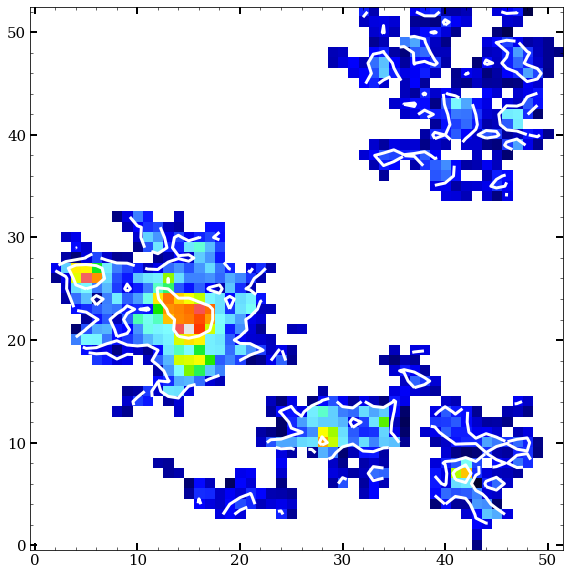

  0%|          | 0/1 [00:01<?, ?it/s]


NameError: name 'count' is not defined

In [10]:
FLUX = np.copy(signal)
area = 0.7**2

filename = 'coadds/G0913_psfcontsub_px0.7'
dat = filename+'.fits'
hdul = fits.open(dat)
output = hdul[0].data * 1e-16
signal = np.copy(output) / area
COUNTS = hdul[0].data
header = hdul[0].header
first_lamb = header['CRVAL3']
spacing = header['CD3_3']
Lambda = np.arange(first_lamb, first_lamb + spacing*len(COUNTS), spacing)

hdul = fits.open('coadds/G0913_psfcontsub_px0.7.var.fits')
VARIANCE = hdul[0].data


# Velocity Window
blue = -1000
red = 1000
z=2.674 # redshift of target

blue = get_wav_obs(blue,1215.67*(1+z))
red = get_wav_obs(red,1215.67*(1+z))
idx_low = list(abs(Lambda-blue)).index(np.min(abs(Lambda-blue)))
idx_high = list(abs(Lambda-red)).index(np.min(abs(Lambda-red)))
print(idx_low,idx_high)

# Here, you can iterate through steps for best parameters
n=[800]
for i in tqdm(n):
    
    mask_master = create_mask(1.2,i,z,COUNTS_smooth, NOISE_smooth)
    FLUX = signal * mask_master
    C = COUNTS * mask_master
    C[C<0] = np.nan
    V = VARIANCE * mask_master 
    V[C<0] = np.nan
    SB = np.sum(FLUX[idx_low:idx_high],0)*0.5 * 1e18
    C = np.nansum(C[idx_low:idx_high],0)
    V = np.nansum(V[idx_low:idx_high],0)
    NOISE = np.sqrt(V)

    SNR = C / NOISE


    SB_noise = np.sum(signal[idx_low:idx_high],0) * 0.5 * 1e18
    
    sb_limit = np.copy(SB)
    sb_limit[sb_limit <= 0] = np.nan
    sb_limit[SNR>2] = np.nan
    sb_limit = np.nanmax(sb_limit) 
    SB[SB==0] = np.nan
    plt.imshow(SB,origin='lower',vmin=-0.4)
    plt.contour(SNR,colors='w',linewidths=3,levels=[2,5])
    plt.show()

    count += 1

dist = np.sqrt((3-42)**2 + (27-6)**2)
print(dist)


# QSO2

  0%|          | 0/1 [00:00<?, ?it/s]

979 1040
Saved as: optextract/optmask.fits


<ipython-input-17-fe0e2ff1d8ae>:43: RuntimeWarning: invalid value encountered in sqrt
  NOISE = np.sqrt(V)
<ipython-input-17-fe0e2ff1d8ae>:45: RuntimeWarning: invalid value encountered in true_divide
  SNR = C / NOISE


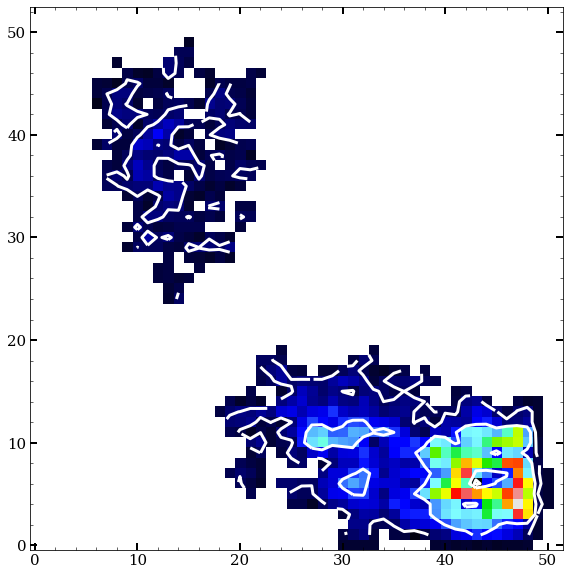

100%|██████████| 1/1 [00:01<00:00,  1.45s/it]

44.294469180700204


In [17]:
FLUX = np.copy(signal)
area = 0.7**2

filename = 'coadds/G0913_psfcontsub_px0.7'
dat = filename+'.fits'
hdul = fits.open(dat)
output = hdul[0].data * 1e-16
signal = np.copy(output) / area
COUNTS = hdul[0].data
header = hdul[0].header
first_lamb = header['CRVAL3']
spacing = header['CD3_3']
Lambda = np.arange(first_lamb, first_lamb + spacing*len(COUNTS), spacing)

hdul = fits.open('coadds/G0913_psfcontsub_px0.7.var.fits')
VARIANCE = hdul[0].data


# Velocity Window
blue = -1000
red = 1000
z=2.75 # redshift of target

blue = get_wav_obs(blue,1215.67*(1+z))
red = get_wav_obs(red,1215.67*(1+z))
idx_low = list(abs(Lambda-blue)).index(np.min(abs(Lambda-blue)))
idx_high = list(abs(Lambda-red)).index(np.min(abs(Lambda-red)))
print(idx_low,idx_high)

# Here, you can iterate through steps for best parameters
n=[800]

for i in tqdm(n):
    
    mask_master = create_mask(1.2,i,z,COUNTS_smooth, NOISE_smooth)
    FLUX = signal * mask_master
    C = COUNTS * mask_master
    C[C<0] = np.nan
    V = VARIANCE * mask_master 
    V[C<0] = np.nan
    SB = np.sum(FLUX[idx_low:idx_high],0)*0.5 * 1e18
    C = np.nansum(C[idx_low:idx_high],0)
    V = np.nansum(V[idx_low:idx_high],0)
    NOISE = np.sqrt(V)

    SNR = C / NOISE


    SB_noise = np.sum(signal[idx_low:idx_high],0) * 0.5 * 1e18
    
    sb_limit = np.copy(SB)
    sb_limit[sb_limit <= 0] = np.nan
    sb_limit[SNR>2] = np.nan
    sb_limit = np.nanmax(sb_limit) 
    SB[SB==0] = np.nan
    plt.imshow(SB,origin='lower',vmin=-0.4)
    plt.contour(SNR,colors='w',linewidths=3,levels=[2,5])
    plt.show()

    count += 1

dist = np.sqrt((3-42)**2 + (27-6)**2)
print(dist)


# QSO1

  0%|          | 0/1 [00:00<?, ?it/s]

1382 1445
Saved as: optextract/optmask.fits


<ipython-input-18-7479a746d09d>:43: RuntimeWarning: invalid value encountered in sqrt
  NOISE = np.sqrt(V)
<ipython-input-18-7479a746d09d>:45: RuntimeWarning: invalid value encountered in true_divide
  SNR = C / NOISE


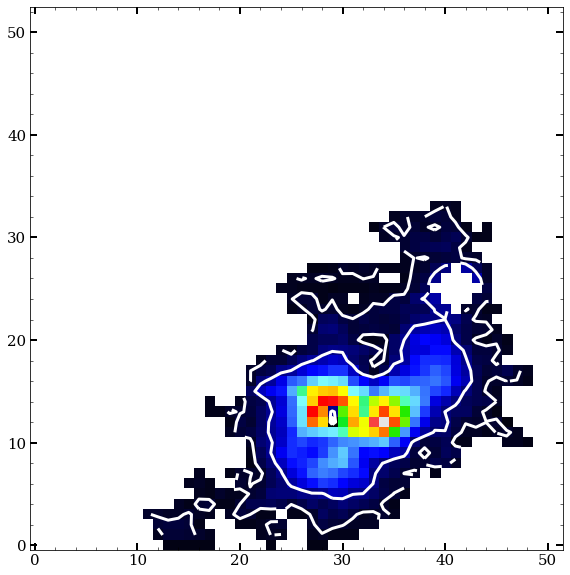

100%|██████████| 1/1 [00:01<00:00,  1.34s/it]

44.294469180700204


In [18]:
FLUX = np.copy(signal)
area = 0.7**2

filename = 'coadds/G0913_psfcontsub_px0.7'
dat = filename+'.fits'
hdul = fits.open(dat)
output = hdul[0].data * 1e-16
signal = np.copy(output) / area
COUNTS = hdul[0].data
header = hdul[0].header
first_lamb = header['CRVAL3']
spacing = header['CD3_3']
Lambda = np.arange(first_lamb, first_lamb + spacing*len(COUNTS), spacing)

hdul = fits.open('coadds/G0913_psfcontsub_px0.7.var.fits')
VARIANCE = hdul[0].data

# Velocity Window
blue = -1000
red = 1000
z=2.916 # redshift of target

blue = get_wav_obs(blue,1215.67*(1+z))
red = get_wav_obs(red,1215.67*(1+z))
idx_low = list(abs(Lambda-blue)).index(np.min(abs(Lambda-blue)))
idx_high = list(abs(Lambda-red)).index(np.min(abs(Lambda-red)))
print(idx_low,idx_high)

# Here, you can iterate through steps for best parameters
n=[800]

for i in tqdm(n):
    
    mask_master = create_mask(1.2,i,z,COUNTS_smooth, NOISE_smooth)
    FLUX = signal * mask_master
    C = COUNTS * mask_master
    C[C<0] = np.nan
    V = VARIANCE * mask_master 
    V[C<0] = np.nan
    SB = np.sum(FLUX[idx_low:idx_high],0)*0.5 * 1e18
    C = np.nansum(C[idx_low:idx_high],0)
    V = np.nansum(V[idx_low:idx_high],0)
    NOISE = np.sqrt(V)

    SNR = C / NOISE


    SB_noise = np.sum(signal[idx_low:idx_high],0) * 0.5 * 1e18
    
    sb_limit = np.copy(SB)
    sb_limit[sb_limit <= 0] = np.nan
    sb_limit[SNR>2] = np.nan
    sb_limit = np.nanmax(sb_limit) 
    SB[SB==0] = np.nan
    plt.imshow(SB,origin='lower',vmin=-0.4)
    plt.contour(SNR,colors='w',linewidths=3,levels=[2,5])
    plt.show()

    count += 1

dist = np.sqrt((3-42)**2 + (27-6)**2)
print(dist)
